In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('gender_submission.csv')

In [3]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Convert the Survival calumn data type to int64 to boolean

df1['Survived'] = df1['Survived'].astype('boolean')

In [7]:
# Convert the Name column data type to string from object

df1['Name'] = df1['Name'].astype('string')

In [8]:
# Renaming the columns

df1 = df1.rename(columns={'Pclass': 'Ticket Class',
                          'Embarked': 'Port of Embarkment',
                          'SibSp': 'Siblings/Spouse',
                          'Parch': 'Parents/Children',
                          'Ticket': 'Ticket Number'},)

In [9]:
df1.columns

Index(['PassengerId', 'Survived', 'Ticket Class', 'Name', 'Sex', 'Age',
       'Siblings/Spouse', 'Parents/Children', 'Ticket Number', 'Fare', 'Cabin',
       'Port of Embarkment'],
      dtype='object')

In [10]:
# Calculating the percentage (%) of people survived

survived = df1[df1['Survived'] == 1]
died = df1[df1['Survived'] == 0]

per = survived.shape[0] * 100/ (survived.shape[0] + died.shape[0])
print(per)

38.38383838383838


In [11]:
# Converting the data type of Sex column to string from object
# This is so we can calculate % of male and female

df1['Sex'] = df1['Sex'].astype('string')

In [35]:
# calculating the % of male and female

male = df1[df1['Sex'] == 'male']
female = df1[df1['Sex'] == 'female']


print(male.shape[0])
print(female.shape[0])

577
314


In [13]:
# calculating the % of male and female survived

male_survived = df1.loc[(df1['Sex'] == 'male') & (df1['Survived'] == 1)]
female_survived = df1.loc[(df1['Sex'] == 'female') & (df1['Survived'] == 1)]

male_died = df1.loc[(df1['Sex'] == 'male') & (df1['Survived'] == 0)]
female_died = df1.loc[(df1['Sex'] == 'female') & (df1['Survived'] == 0)]

male_per = (male_survived.shape[0] * 100) / (male_survived.shape[0] + male_died.shape[0])
female_per = (female_survived.shape[0] * 100) / (female_survived.shape[0] + female_died.shape[0])

In [14]:
print(male_per)
print(female_per)

18.890814558058924
74.20382165605096


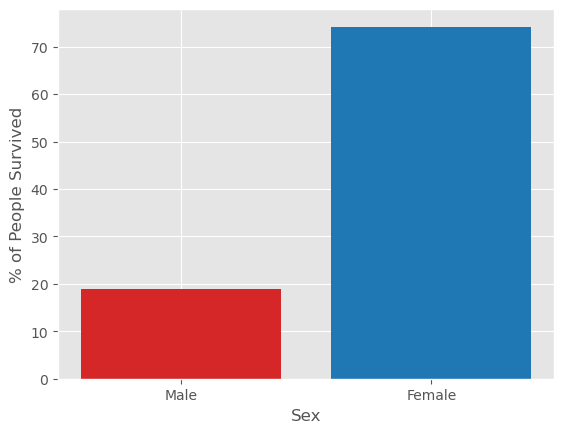

In [15]:
fig3, ax5 = plt.subplots()


ax5.bar(['Male', 'Female'], [male_per, female_per], color=['tab:red', 'tab:blue'])

ax5.set_xlabel('Sex')
ax5.set_ylabel('% of People Survived')


plt.show()

In [16]:
# Converting the data type of ticket class column to integer from object
# this is so we can calculate the following metric

df1['Ticket Class'] = df1['Ticket Class'].astype('int8')

In [17]:
# calculating the % of people survived based on ticket class (socio-economic class)

first_survived = df1.loc[(df1['Survived'] == 1) & (df1['Ticket Class'] == 1)]
second_survived = df1.loc[(df1['Survived'] == 1) & (df1['Ticket Class'] == 2)]
third_survived = df1.loc[(df1['Survived'] == 1) & (df1['Ticket Class'] == 3)]

first_died = df1.loc[(df1['Survived'] == 0) & (df1['Ticket Class'] == 1)]
second_died = df1.loc[(df1['Survived'] == 0) & (df1['Ticket Class'] == 2)]
third_died = df1.loc[(df1['Survived'] == 0) & (df1['Ticket Class'] == 3)]

first_per = (first_survived.shape[0] * 100) / (first_survived.shape[0] + first_died.shape[0])

second_per = (second_survived.shape[0] * 100) / (second_survived.shape[0] + second_died.shape[0])

third_per = (third_survived.shape[0] * 100) / (third_survived.shape[0] + third_died.shape[0])

In [18]:
print(first_per)
print(second_per)
print(third_per)

62.96296296296296
47.28260869565217
24.236252545824847


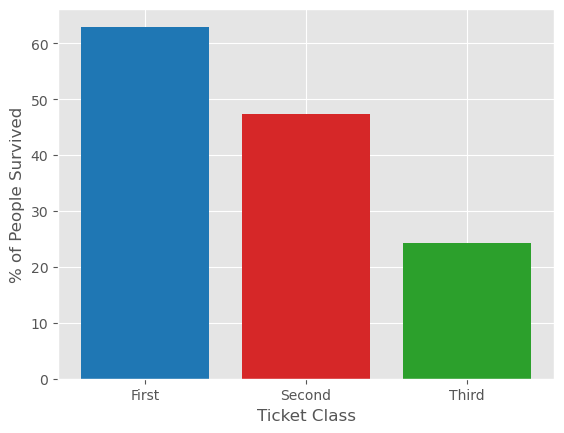

In [19]:
fig, ax1 = plt.subplots()

ax1_colors = ['tab:blue', 'tab:red', 'tab:green']
ax1.bar(['First', 'Second', 'Third'], [first_per, second_per, third_per], label=['First', 'Second', 'Third'], color=ax1_colors)

ax1.set_xlabel('Ticket Class')
ax1.set_ylabel('% of People Survived')

plt.show()

In [20]:
# Converting the data type of Port of embarkment column to string from object

df1['Port of Embarkment'] = df1['Port of Embarkment'].astype('string')

In [21]:
# grouping the Port of Embarkment and Ticket Class columns together
# To plot a graph between them

port_vs_economic = df1.groupby(['Port of Embarkment', 'Ticket Class'])['Ticket Class'].count()

In [22]:
# Grouping data based on Ticket Class and Port of Embarkment for ploting

first_C = df1.loc[(df1['Ticket Class'] == 1) & (df1['Port of Embarkment'] == 'C')]
second_C = df1.loc[(df1['Ticket Class'] == 2) & (df1['Port of Embarkment'] == 'C')]
third_C = df1.loc[(df1['Ticket Class'] == 3) & (df1['Port of Embarkment'] == 'C')]

first_S = df1.loc[(df1['Ticket Class'] == 1) & (df1['Port of Embarkment'] == 'S')]
second_S = df1.loc[(df1['Ticket Class'] == 2) & (df1['Port of Embarkment'] == 'S')]
third_S = df1.loc[(df1['Ticket Class'] == 3) & (df1['Port of Embarkment'] == 'S')]

first_Q = df1.loc[(df1['Ticket Class'] == 1) & (df1['Port of Embarkment'] == 'Q')]
second_Q = df1.loc[(df1['Ticket Class'] == 2) & (df1['Port of Embarkment'] == 'Q')]
third_Q = df1.loc[(df1['Ticket Class'] == 3) & (df1['Port of Embarkment'] == 'Q')]

first_class = [first_C.shape[0], first_S.shape[0], first_Q.shape[0]]
second_class = [second_C.shape[0], second_S.shape[0], second_Q.shape[0]]
third_class = [third_C.shape[0], third_S.shape[0], third_Q.shape[0]]

In [23]:
a = 0.25
r = np.arange(5)
r_1 = r + a
r_2 = r_1 + a

print(r)
print(r_1)
print(r_2)

[0 1 2 3 4]
[0.25 1.25 2.25 3.25 4.25]
[0.5 1.5 2.5 3.5 4.5]


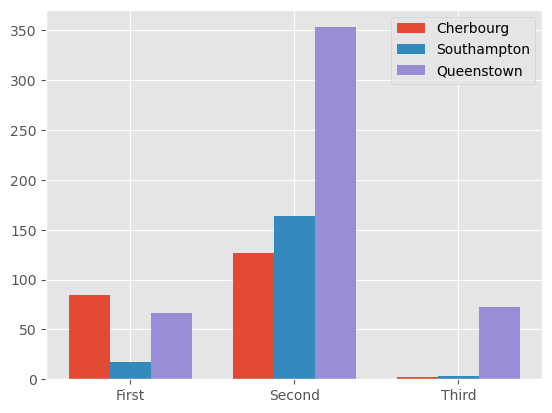

In [24]:
bar_width = 0.25

plot_range = range(len(first_class))

r1 = []
r2 = []
r3 = []

for i in plot_range:
    r1.append(i)
    r2.append(i + (1 * bar_width))
    r3.append(i + (2 * bar_width))

fig2, ax2 = plt.subplots(dpi=100)

ax2.bar(r1, first_class, width=bar_width, label='Cherbourg')
ax2.bar(r2, second_class, width=bar_width, label='Southampton')
ax2.bar(r3, third_class, width=bar_width, label='Queenstown')


ax2.set_xticks(r2)
ax2.set_xticklabels(['First', 'Second', 'Third'])

ax2.legend()
plt.show()

In [25]:
# Categorizing People into different bins based on their Age

df1['AgeGroup'] = pd.cut(df1['Age'], bins=[0, 12, 18, 50, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])

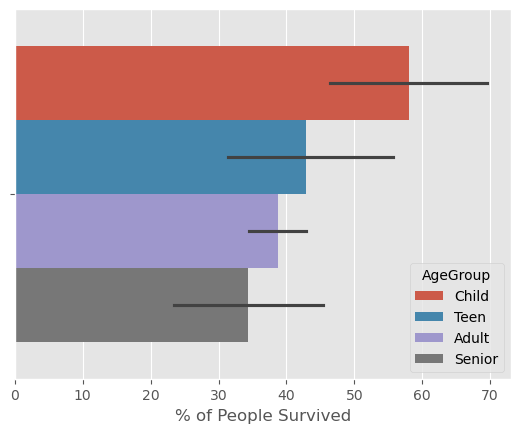

In [26]:
ax3 = sns.barplot(data=df1, x=(df1['Survived']*100), hue='AgeGroup')

ax3.set_xlabel('% of People Survived')
plt.show()

In [27]:
df1['Familysize'] = df1['Siblings/Spouse'] + df1['Parents/Children'] + 1

In [28]:
df1['Familysize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Familysize, Length: 891, dtype: int64

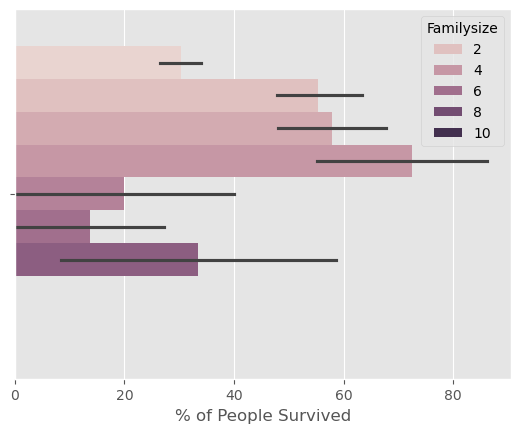

In [29]:
ax4 = sns.barplot(data=df1, x=(df1['Survived']*100), hue='Familysize')

ax4.set_xlabel('% of People Survived')

plt.show()

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    boolean 
 2   Ticket Class        891 non-null    int8    
 3   Name                891 non-null    string  
 4   Sex                 891 non-null    string  
 5   Age                 714 non-null    float64 
 6   Siblings/Spouse     891 non-null    int64   
 7   Parents/Children    891 non-null    int64   
 8   Ticket Number       891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  Port of Embarkment  889 non-null    string  
 12  AgeGroup            714 non-null    category
 13  Familysize          891 non-null    int64   
dtypes: boolean(1), category(1), float64(2), int64(4), int8(1), object(2), string(3)
memory usa

In [31]:
# Converting the Sex column data type to category from string
# Converting the Port of Embarkment column data type to category from string

df1['Sex'] = df1['Sex'].astype('category')
df1['Port of Embarkment'] = df1['Port of Embarkment'].astype('category')

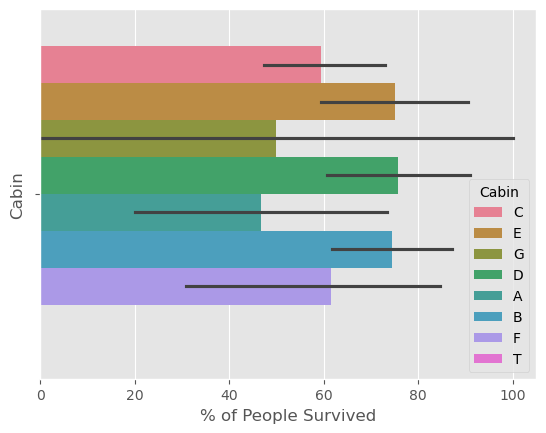

In [32]:
df1['Cabin'] = df1['Cabin'].str[0]
ax6 = sns.barplot(data=df1, x=(df1['Survived']*100), hue='Cabin')

ax6.set_xlabel('% of People Survived')
ax6.set_ylabel('Cabin')
plt.show()

In [29]:
survived.shape[0]

342